Library Imports

In [173]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Deficiency Logic (Part 1)

In [174]:
#code for reading file
def readf(file):
    f = open(file, encoding="utf-8")
    data = list(csv.reader(f))
    f.close()
    return data

In [175]:
#code for formatting deficiency_code
def padding(defcode):
    defcode = str(defcode)
    if len(defcode) < 5:
        defcode = "0" + defcode
    return defcode

In [176]:
scores = {}
count = {}
average = {}
conversion = {"Not a deficiency": 0, "Low": 1, "Medium": 2, "High": 3}
data = readf("psc_severity_train.csv")
print(data[5015][4])
for row in data[1:]:
    defcode = padding(row[1])
    if row[4] != '':
        if defcode not in scores:
            count[defcode] = 1
            scores[defcode] = conversion[row[4]]

        else:
            count[defcode] += 1
            scores[defcode] += conversion[row[4]]
for defcode in scores:
    average[defcode] = round(scores[defcode]/count[defcode],3)
# print(scores)
# print(count)
# print(average)

Low


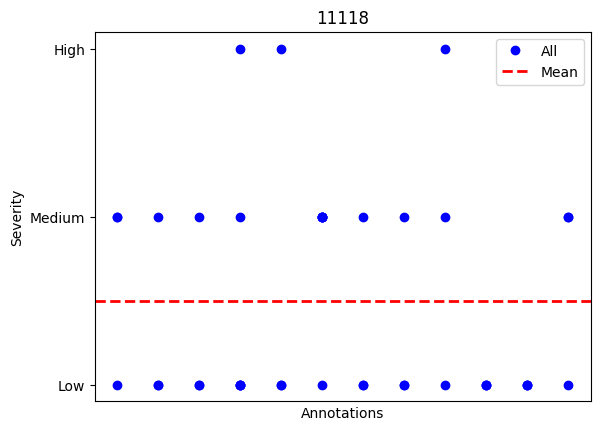

In [177]:
# charting
input_code = input("Enter code: ")

x = []
y = []

for row in data[1:]:
    if padding(input_code) == row[1]:
        x.append(row[0])
        y.append(conversion[row[4]])

# Create the plot
plt.plot(x, y, marker='o', linestyle='', color='b', label='All')
plt.axhline(y=average[padding(input_code)], color='r', linestyle='--', linewidth=2, label='Mean')

plt.xticks([])
tick_positions = [1, 2, 3]  # Custom positions
tick_labels = ['Low', 'Medium', 'High']  # Custom labels
plt.yticks(tick_positions, tick_labels)

# Add labels and title
plt.xlabel('Annotations')
plt.ylabel('Severity')
plt.title(input_code)

# Show the legend
plt.legend()

# Display the chart
plt.show()

In [178]:
df = pd.read_csv('psc_severity_train.csv')
# Maps all highs to 3, meds to 2, lows to 1 
df['annotation_severity'] = df['annotation_severity'].map(conversion)
# Groups all deficiency codes into one place and finds mean severity rate for each deficiency code
meandf = df.groupby("deficiency_code")["annotation_severity"].mean()
# finds median severity rate for each deficiency code
mediandf = df.groupby("deficiency_code")["annotation_severity"].median()
# finds statistics summary for each deficiency code
describedf = df.groupby("deficiency_code")["annotation_severity"].describe()
print(describedf)

                 count      mean       std  min   25%  50%  75%  max
deficiency_code                                                     
1101              55.0  1.327273  0.771111  0.0  1.00  1.0  2.0  3.0
1102              40.0  1.900000  1.081310  0.0  1.00  2.0  3.0  3.0
1104              29.0  1.241379  0.576639  1.0  1.00  1.0  1.0  3.0
1105              21.0  2.000000  0.774597  1.0  1.00  2.0  3.0  3.0
1106              24.0  1.416667  0.717282  1.0  1.00  1.0  2.0  3.0
...                ...       ...       ...  ...   ...  ...  ...  ...
18432             30.0  2.066667  0.868345  0.0  1.25  2.0  3.0  3.0
18499             49.0  1.857143  0.735980  1.0  1.00  2.0  2.0  3.0
99101             56.0  1.982143  0.841883  0.0  1.00  2.0  3.0  3.0
99102             44.0  2.090909  0.741406  1.0  2.00  2.0  3.0  3.0
99103             29.0  1.862069  0.789400  1.0  1.00  2.0  2.0  3.0

[438 rows x 8 columns]
